In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True

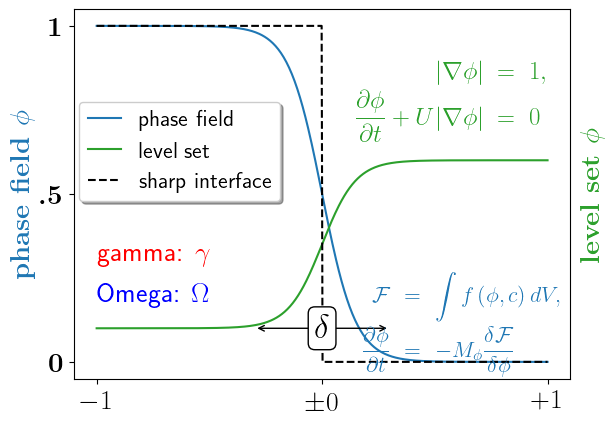

In [2]:
fig, ax = plt.subplots()
# interface tracking profiles
N = 500
delta = 0.6
X = np.linspace(-1, 1, N)
ax.plot(X, (1 - np.tanh(4 * X / delta)) / 2,    # phase field tanh profiles
        X, (1.4 + np.tanh(4 * X / delta)) / 4, "C2",  # composition profile
        X, X < 0, "k--")                        # sharp interface

# legend
ax.legend(("phase field", "level set", "sharp interface"),
          shadow=True, loc=(0.01, 0.48), handlelength=1.5, fontsize=16)

# the arrow
ax.annotate("", xy=(-delta / 2., 0.1), xytext=(delta / 2., 0.1),
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
ax.text(0, 0.1, r"$\delta$",
        color="black", fontsize=24,
        horizontalalignment="center", verticalalignment="center",
        bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2))

# Use tex in labels
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(["$-1$", r"$\pm 0$", "$+1$"], color="k", size=20)

# Left Y-axis labels, combine math mode and text mode
ax.set_ylabel(r"\bf{phase field} $\phi$", color="C0", fontsize=20)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([r"\bf{0}", r"\bf{.5}", r"\bf{1}"], color="k", size=20)

# Right Y-axis labels
ax.text(1.02, 0.5, r"\bf{level set} $\phi$",
        color="C2", fontsize=20, rotation=90,
        horizontalalignment="left", verticalalignment="center",
        clip_on=False, transform=ax.transAxes)

# Use multiline environment inside a `text`.
# level set equations
eq1 = (r"\begin{eqnarray*}"
       r"|\nabla\phi| &=& 1,\\"
       r"\frac{\partial \phi}{\partial t} + U|\nabla \phi| &=& 0 "
       r"\end{eqnarray*}")
ax.text(1, 0.9, eq1, color="C2", fontsize=18,
        horizontalalignment="right", verticalalignment="top")

# phase field equations
eq2 = (r"\begin{eqnarray*}"
       r"\mathcal{F} &=& \int f\left( \phi, c \right) dV, \\ "
       r"\frac{ \partial \phi } { \partial t } &=& -M_{ \phi } "
       r"\frac{ \delta \mathcal{F} } { \delta \phi }"
       r"\end{eqnarray*}")
ax.text(0.18, 0.18, eq2, color="C0", fontsize=16)

ax.text(-1, .30, r"gamma: $\gamma$", color="r", fontsize=20)
ax.text(-1, .18, r"Omega: $\Omega$", color="b", fontsize=20)

plt.show()

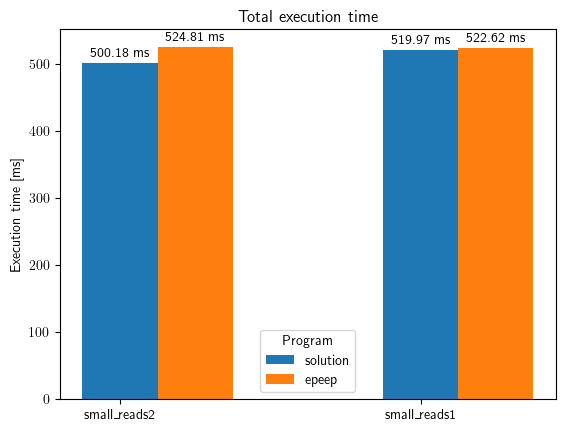

In [8]:
import numpy as np
import matplotlib

stats = {'solution': {'small_reads1': {'total_execution': {'t_samples_count': 1, 't_min': 519.97, 't_max': 519.97, 't_avg': 519.97, 't_total': 519.97}, 'ref_chunk_building': {'t_samples_count': 1, 't_min': 3.52, 't_max': 3.52, 't_avg': 3.52, 't_total': 3.52}, 'read_index_building': {'t_samples_count': 100, 't_min': 1.84, 't_max': 8.9, 't_avg': 2.11, 't_total': 211.18}, 'read_lis': {'t_samples_count': 100, 't_min': 1.27, 't_max': 5.22, 't_avg': 1.42, 't_total': 142.81}}, 'small_reads2': {'total_execution': {'t_samples_count': 1, 't_min': 500.18, 't_max': 500.18, 't_avg': 500.18, 't_total': 500.18}, 'ref_chunk_building': {'t_samples_count': 1, 't_min': 4.2, 't_max': 4.2, 't_avg': 4.2, 't_total': 4.2}, 'read_index_building': {'t_samples_count': 100, 't_min': 1.81, 't_max': 6.21, 't_avg': 2.0, 't_total': 200.72}, 'read_lis': {'t_samples_count': 100, 't_min': 1.25, 't_max': 4.65, 't_avg': 1.38, 't_total': 138.78}}}, 'epeep': {'small_reads1': {'total_execution': {'t_samples_count': 1, 't_min': 522.62, 't_max': 522.62, 't_avg': 522.62, 't_total': 522.62}, 'ref_chunk_building': {'t_samples_count': 1, 't_min': 3.24, 't_max': 3.24, 't_avg': 3.24, 't_total': 3.24}, 'read_index_building': {'t_samples_count': 100, 't_min': 1.83, 't_max': 7.65, 't_avg': 2.08, 't_total': 208.69}, 'read_lis': {'t_samples_count': 100, 't_min': 1.25, 't_max': 5.36, 't_avg': 1.5, 't_total': 150.88}}, 'small_reads2': {'total_execution': {'t_samples_count': 1, 't_min': 524.81, 't_max': 524.81, 't_avg': 524.81, 't_total': 524.81}, 'ref_chunk_building': {'t_samples_count': 1, 't_min': 3.3, 't_max': 3.3, 't_avg': 3.3, 't_total': 3.3}, 'read_index_building': {'t_samples_count': 100, 't_min': 1.83, 't_max': 8.75, 't_avg': 2.11, 't_total': 211.87}, 'read_lis': {'t_samples_count': 100, 't_min': 1.27, 't_max': 5.57, 't_avg': 1.47, 't_total': 147.9}}}}
fig, ax = plt.subplots()
cases = list({case_name for program_label, program_stats in stats.items() for case_name in program_stats})
width = 0.25
multiplier = 0
x = np.arange(len(cases))
for program_label, program_stats in stats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [program_stats[case]["total_execution"]["t_total"] for case in cases], width, label=program_label)
    ax.bar_label(rects, padding=3, fmt="%g ms")
    multiplier += 1

ax.set_xticks(x, cases)
ax.set_ylabel('Execution time [ms]')
ax.set_title("Total execution time")
ax.legend(title='Program')

plt.show()

In [4]:
import json
json.dumps({'solution': {'small_reads1': {'total_execution': {'t_samples_count': 1, 't_min': 519.97, 't_max': 519.97, 't_avg': 519.97, 't_total': 519.97}, 'ref_chunk_building': {'t_samples_count': 1, 't_min': 3.52, 't_max': 3.52, 't_avg': 3.52, 't_total': 3.52}, 'read_index_building': {'t_samples_count': 100, 't_min': 1.84, 't_max': 8.9, 't_avg': 2.11, 't_total': 211.18}, 'read_lis': {'t_samples_count': 100, 't_min': 1.27, 't_max': 5.22, 't_avg': 1.42, 't_total': 142.81}}, 'small_reads2': {'total_execution': {'t_samples_count': 1, 't_min': 500.18, 't_max': 500.18, 't_avg': 500.18, 't_total': 500.18}, 'ref_chunk_building': {'t_samples_count': 1, 't_min': 4.2, 't_max': 4.2, 't_avg': 4.2, 't_total': 4.2}, 'read_index_building': {'t_samples_count': 100, 't_min': 1.81, 't_max': 6.21, 't_avg': 2.0, 't_total': 200.72}, 'read_lis': {'t_samples_count': 100, 't_min': 1.25, 't_max': 4.65, 't_avg': 1.38, 't_total': 138.78}}}, 'epeep': {'small_reads1': {'total_execution': {'t_samples_count': 1, 't_min': 522.62, 't_max': 522.62, 't_avg': 522.62, 't_total': 522.62}, 'ref_chunk_building': {'t_samples_count': 1, 't_min': 3.24, 't_max': 3.24, 't_avg': 3.24, 't_total': 3.24}, 'read_index_building': {'t_samples_count': 100, 't_min': 1.83, 't_max': 7.65, 't_avg': 2.08, 't_total': 208.69}, 'read_lis': {'t_samples_count': 100, 't_min': 1.25, 't_max': 5.36, 't_avg': 1.5, 't_total': 150.88}}, 'small_reads2': {'total_execution': {'t_samples_count': 1, 't_min': 524.81, 't_max': 524.81, 't_avg': 524.81, 't_total': 524.81}, 'ref_chunk_building': {'t_samples_count': 1, 't_min': 3.3, 't_max': 3.3, 't_avg': 3.3, 't_total': 3.3}, 'read_index_building': {'t_samples_count': 100, 't_min': 1.83, 't_max': 8.75, 't_avg': 2.11, 't_total': 211.87}, 'read_lis': {'t_samples_count': 100, 't_min': 1.27, 't_max': 5.57, 't_avg': 1.47, 't_total': 147.9}}}})

'{"solution": {"small_reads1": {"total_execution": {"t_samples_count": 1, "t_min": 519.97, "t_max": 519.97, "t_avg": 519.97, "t_total": 519.97}, "ref_chunk_building": {"t_samples_count": 1, "t_min": 3.52, "t_max": 3.52, "t_avg": 3.52, "t_total": 3.52}, "read_index_building": {"t_samples_count": 100, "t_min": 1.84, "t_max": 8.9, "t_avg": 2.11, "t_total": 211.18}, "read_lis": {"t_samples_count": 100, "t_min": 1.27, "t_max": 5.22, "t_avg": 1.42, "t_total": 142.81}}, "small_reads2": {"total_execution": {"t_samples_count": 1, "t_min": 500.18, "t_max": 500.18, "t_avg": 500.18, "t_total": 500.18}, "ref_chunk_building": {"t_samples_count": 1, "t_min": 4.2, "t_max": 4.2, "t_avg": 4.2, "t_total": 4.2}, "read_index_building": {"t_samples_count": 100, "t_min": 1.81, "t_max": 6.21, "t_avg": 2.0, "t_total": 200.72}, "read_lis": {"t_samples_count": 100, "t_min": 1.25, "t_max": 4.65, "t_avg": 1.38, "t_total": 138.78}}}, "epeep": {"small_reads1": {"total_execution": {"t_samples_count": 1, "t_min": 522.